# 2.2 Conditional Frequency Distributions #

In [1]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Counting Words by Genre ##

**FreqDist() takes a simple list as input, ConditionalFreqDist() takes a list of pairs.**

In [13]:
from nltk.corpus import brown
import nltk 

cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))

In [20]:
genre_word = [(genre, word)
    for genre in ['news', 'romance']
    for word in brown.words(categories=genre)]

In [21]:
len(genre_word)

170576

In [22]:
genre_word[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [23]:
genre_word[-4:]

[('romance', 'afraid'),
 ('romance', 'not'),
 ('romance', "''"),
 ('romance', '.')]

In [24]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd.conditions()

['news', 'romance']

In [ ]:
cfd['news']
#<FreqDist with 100554 outcomes>
cfd['romance']
#<FreqDist with 70022 outcomes>
list(cfd['romance'])
#[',', '.', 'the', 'and', 'to', 'a', 'of', '``', "''", 'was', 'I', 'in', 'he', 'had',
#'?', 'her', 'that', 'it', 'his', 'she', 'with', 'you', 'for', 'at', 'He', 'on', 'him',
#'said', '!', '--', 'be', 'as', ';', 'have', 'but', 'not', 'would', 'She', 'The', ...]

In [26]:
cfd['romance']['could']

193

## Plotting and Tabulating Distributions ##

It exploits the fact that the filename for each speech—for example,
1865-Lincoln.txt—contains the year as the first four characters . This code generates
the pair ('america', '1865') for every instance of a word whose lowercased form starts
with america—such as Americans—in the file 1865-Lincoln.txt.

In [27]:
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))

This time, the condition is the name of the language, and
the counts being plotted are derived from word lengths . It exploits the fact that the
filename for each language is the language name followed by '-Latin1' (the character
encoding).

In [28]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch','Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))

For example,
we can tabulate the cumulative frequency data just for two languages, and for
words less than 10 characters long, as shown next. We interpret the last cell on the top
row to mean that 1,638 words of the English text have nine or fewer letters.

In [29]:
cfd.tabulate(conditions=['English', 'German_Deutsch'],samples=range(10), cumulative=True)

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


In [35]:
#Exercise
from nltk.corpus import brown
days = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday','Sunday']
cfd = nltk.ConditionalFreqDist(
    (day, len(word))
    for day in days
    for word in brown.sents(categories=['news', 'romance']))

In [36]:
cfd.tabulate(conditions=['Monday'],samples=range(10), cumulative=True)

          0    1    2    3    4    5    6    7    8    9 
Monday    0   45  136  355  555  813 1130 1491 1882 2238 


## Generating Random Text with Bigrams ##

In [37]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven','and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

In [39]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

In [40]:
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [41]:
cfd['living']

FreqDist({'creature': 7, 'thing': 4, 'substance': 2, 'soul': 1, '.': 1, ',': 1})

In [42]:
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land 

|Example|Description|
|--------|---------|
|cfdist = ConditionalFreqDist(pairs)|create a conditional frequency distribution from a list of pairs|
|cfdist.conditions()|the conditions|
|cfdist[condition]|the frequency distribution for this condition|
|cfdist[condition][sample]|frequency for the given sample for this condition|
|cfdist.tabulate()|tabulate the conditional frequency distribution|
|cfdist.tabulate(samples, conditions)|tabulation limited to the specified samples and conditions|
|cfdist.plot()|graphical plot of the conditional frequency distribution|
|cfdist.plot(samples, conditions)|graphical plot limited to the specified samples and conditions|
|cfdist1 < cfdist2|test if samples in cfdist1 occur less frequently than in cfdist2|

## More Python: Reusing Code ##

In [43]:
from __future__ import division
def lexical_diversity(text):
    return len(text) / len(set(text))

In [44]:
def lexical_diversity(my_text_data):
    word_count = len(my_text_data)
    vocab_size = len(set(my_text_data))
    diversity_score = vocab_size / word_count
    return diversity_score

In [45]:
from nltk.corpus import genesis
kjv = genesis.words('english-kjv.txt')
lexical_diversity(kjv)

0.06230453042623537

In [46]:
def plural(word):
    if word.endswith('y'):
        return word[:-1] + 'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh', 'ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'

plural('fairy')

'fairies'

In [47]:
plural('woman')

'women'

## Lexical Resources ##

In [48]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

In [ ]:
unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))

In [ ]:
unusual_words(nltk.corpus.nps_chat.words())
#['aaaaaaaaaaaaaaaaa', 'aaahhhh', 'abortions', 'abou', 'abourted', 'abs', 'ack',
#'acros', 'actualy', 'adams', 'adds', 'adduser', 'adjusts', 'adoted', 'adreniline',
#'ads', 'adults', 'afe', 'affairs', 'affari', 'affects', 'afk', 'agaibn', 'ages', ...]

In [ ]:
#There is also a corpus of stopwords, that is, high-frequency words like the, to and also that we sometimes want to filter out of a document 
#before further processing. Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts.
from nltk.corpus import stopwords
stopwords.words('english')
#['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
#'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
#'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
#'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
#'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
#'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
#'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
#'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
#'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
#'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
#'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
#'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']

In [52]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)

In [53]:
content_fraction(nltk.corpus.reuters.words())

0.735240435097661

A wordlist is useful for solving word puzzles, such as the one in 4.3. Our program iterates through every word and, for each one, checks whether it meets the conditions. It is easy to check obligatory letter [2] and length constraints [1] (and we'll only look for words with six or more letters here). It is trickier to check that candidate solutions only use combinations of the supplied letters, especially since some of the supplied letters appear twice (here, the letter v). The FreqDist comparison method [3] permits us to check that the frequency of each letter in the candidate word is less than or equal to the frequency of the corresponding letter in the puzzle.

In [ ]:
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()
[w for w in wordlist if len(w) >= 6 [1] and obligatory in w [2] and nltk.FreqDist(w) <= puzzle_letters] [3]
#['glover', 'gorlin', 'govern', 'grovel', 'ignore', 'involver', 'lienor',
#'linger', 'longer', 'lovering', 'noiler', 'overling', 'region', 'renvoi',
#'revolving', 'ringle', 'roving', 'violer', 'virole']

One more wordlist corpus is the Names corpus, containing 8,000 first names categorized by gender. The male and female names are stored in separate files. Let's find names which appear in both files, i.e. names that are ambiguous for gender:

In [ ]:
names = nltk.corpus.names
names.fileids()
#['female.txt', 'male.txt']
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names]
#['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis',
#'Alfie', 'Ali', 'Alix', 'Allie', 'Allyn', 'Andie', 'Andrea', 'Andy', 'Angel',
#'Angie', 'Ariel', 'Ashley', 'Aubrey', 'Augustine', 'Austin', 'Averil', ...]

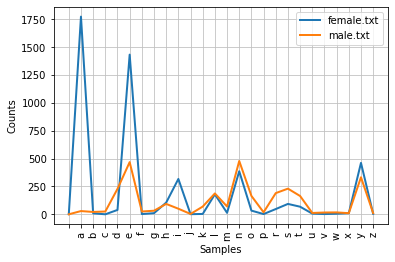

In [55]:
names = nltk.corpus.names
cfd = nltk.ConditionalFreqDist((fileid, name[-1]) for fileid in names.fileids() for name in names.words(fileid))
cfd.plot()

In [ ]:
[(fileid, name[-1])  for fileid  in names.fileids() for name in names.words(fileid)]
#[('female.txt', 'l'),('female.txt', 'l'),('female.txt', 'e'), ('female.txt', 'y'), ('female.txt', 'i'), ('female.txt', 'e'), ('female.txt', 'y'), ('female.txt', 'l'),
# ('female.txt', 'l'),('female.txt', 'e'), ('female.txt', 'a'), ('female.txt', 'a'),..]